In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv(r'C:\Users\bedir\Desktop\CCIC\kc_house_data - kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  sqft_l

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,1.510697e+04,1788.390691,291.509045
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,4.142051e+04,828.090978,442.575043
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,5.200000e+02,290.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,5.040000e+03,1190.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,7.618000e+03,1560.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.068800e+04,2210.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.651359e+06,9410.000000,4820.000000


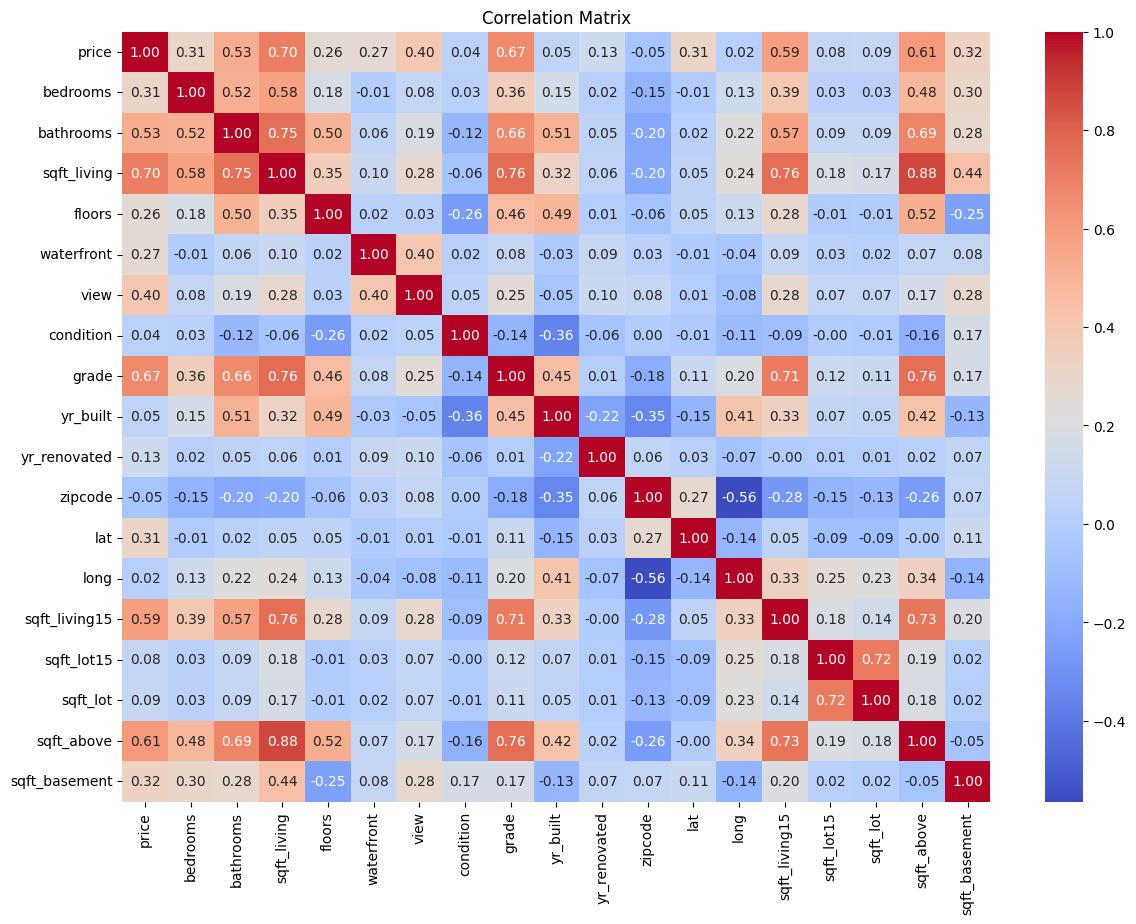

In [5]:
df = df.drop(columns=['id','date'])

# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Correlation with the target variable
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Display the top 3 correlated variables
print("Top 3 correlated features with price:")
print(correlation_with_price[1:4])

Top 3 correlated features with price:
sqft_living    0.702044
grade          0.667463
sqft_above     0.605566
Name: price, dtype: float64


In [7]:
# top 3 features
selected_features = ['sqft_living', 'grade', 'sqft_above'] 

X = df[selected_features].values
y = df['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

R-squared score: 0.54


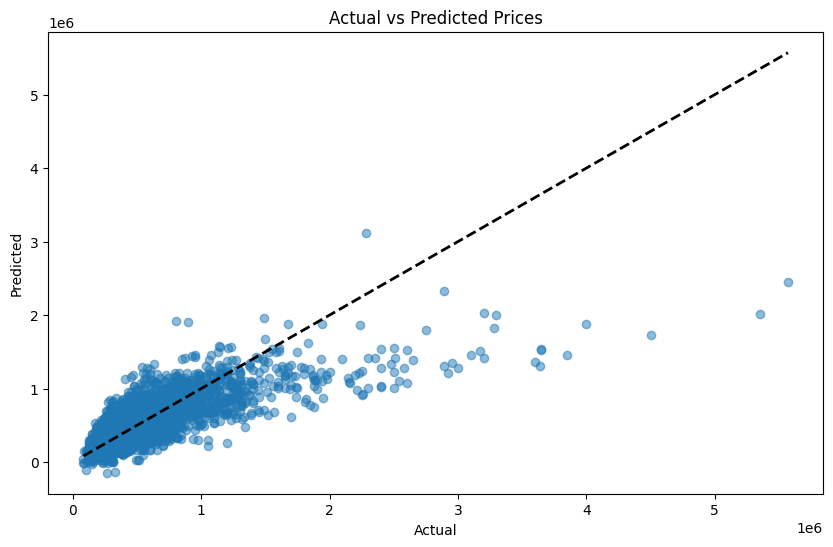

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()